# Exercici 1

Agafa un conjunt de dades de tema que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica.

In [3]:
import pandas as pd 
import numpy as np 
import random

In [4]:
#source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
df = pd.read_csv("heart_2020_cleaned.csv") 

This dataset is the 2020 annual CDC survey data of 400k adults related to their health status. People were asked about the following:
* If they have heart disease
* Their body mass index
* If they are or were smokers
* If they are heavy drinkers
* If they ever had a stroke
* Their physical and mental health during the last 30 days
* If they have difficulties walking
* Their sex
* Their age
* Their race
* If they are diabetic
* If they were physically active outside their job during the last 30 days
* Their general health
* Their average sleep time
* If they have asthma
* If they had cronic kidney disease
* If they ever had skin cancer

In [5]:
df.shape

(319795, 18)

In [6]:
#taking a simple random sample of 1000 rows 
random_df = df.sample(1000)

In [39]:
#define systematic sampling function
def syst_sampling(df, s): #df is dataframe, s is sample size we want
    start = random.randint(0, int(len(df) / s))
    indexes = np.arange(start, len(df), step = int(len(df) / s))
    return df.iloc[indexes]

In [44]:
#taking a systematic sample of 1000 rows
systematic_df = syst_sampling(df, 1000)
systematic_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
255,No,20.75,Yes,No,No,0.0,0.0,No,Male,75-79,White,No,No,Good,8.0,No,No,Yes
574,No,27.32,No,No,No,0.0,0.0,No,Male,50-54,Black,No,Yes,Excellent,8.0,No,No,No
893,No,34.67,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,Yes,No,Good,5.0,No,No,No
1212,No,29.29,Yes,No,No,30.0,0.0,Yes,Female,60-64,White,"No, borderline diabetes",No,Poor,3.0,Yes,No,No
1531,No,34.75,No,No,No,0.0,2.0,No,Female,35-39,White,No,Yes,Very good,6.0,No,No,No


# Exercici 2

Genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique).

In [7]:
strat_df = df.groupby("HeartDisease", group_keys = False).apply(lambda x: x.sample(frac = 0.25))

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 1.0, 'Heart disease prevalence in the main data set')]

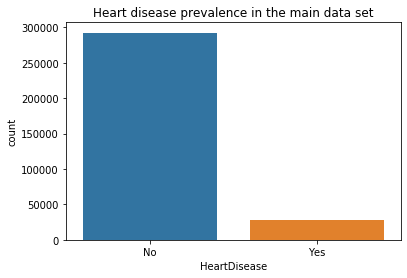

In [16]:
sns.countplot(x = "HeartDisease",  data = df).set(title = "Heart disease prevalence in the main data set")

[Text(0.5, 1.0, 'Heart disease prevalence in the stratified sample')]

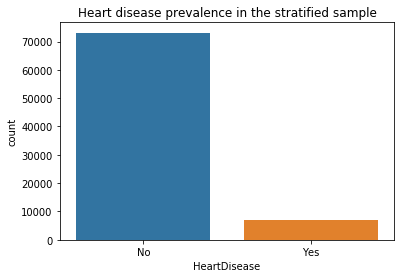

In [17]:
sns.countplot(x = "HeartDisease",  data = strat_df).set(title = "Heart disease prevalence in the stratified sample")

As we can see, the proportion of heart disease is kept constant when taking a stratified sample.

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
#sample using borderline SMOTE
from imblearn.over_sampling import BorderlineSMOTE

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    df[["BMI", "PhysicalHealth"]], df["SleepTime"], test_size = 0.2,  stratify = df["SleepTime"])

In [17]:
#X, y = SMOTE().fit_resample(df[["BMI", "PhysicalHealth"]], df["SleepTime"])
#no entenc per què aixo em dona eror
bsmote = BorderlineSMOTE(kind = 'borderline-1')
X_oversample_borderline, y_oversample_borderline = bsmote.fit_resample(X_train, y_train)

In [ ]:
X, y = SMOTE().fit_resample(df[["BMI", "PhysicalHealth"]], df["SleepTime"])

# Exercici 3

Genera una mostra utilitzant el mètode Reservoir sampling. 

In [17]:
def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number
        
#create as stream generator
stream = generator(df.shape[0]) 

#reservoir sampling from the stream
k = 1000
reservoir = []
for i, element in enumerate(stream):
    if i + 1 <= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
            # Select item in stream and remove one of the k items already selected
             reservoir[random.choice(range(0, k))] = element

#use the indexes generated to get the sampled dataframe
reservoir_df = df.iloc[reservoir]